## Predicting Loan Default

In [6]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
## import and  read file 
df = pd.read_excel("DATASET/Default_Fin.xlsx")
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [8]:
# drop the index column
df.drop(columns='Index', inplace=True)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [9]:
# Rename Defaulted? as Defaulted
df.rename(columns={'Defaulted?': 'Defaulted'}, inplace=True)
df.head()                    

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [10]:
# Check Unique Values
df['Employed'].value_counts()



1    7056
0    2944
Name: Employed, dtype: int64

In [11]:
# write a code for the Employed to have 0 = unemployed, 1 = employed
def employ_status(x):
    if x == 1:
        return 'Employed'
    else:
        return 'Unemployed'
df['Employed'] = df['Employed'].apply(employ_status)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,Employed,8754.36,532339.56,0
1,Unemployed,9806.16,145273.56,0
2,Employed,12882.60,381205.68,0
3,Employed,6351.00,428453.88,0
4,Employed,9427.92,461562.00,0


In [12]:
# Summary statistics of the data
df.describe().astype('int')

,Bank Balance,Annual Salary,Defaulted
count,10000,10000,10000
mean,10024,402203,0
std,5804,160039,0
min,0,9263,0
25%,5780,256085,0
50%,9883,414631,0
75%,13995,525692,0
max,31851,882650,1


In [13]:
# Check for negative value
df[df[['Bank Balance', 'Annual Salary']]< 0 ].sum()


Employed           0
Bank Balance     0.0
Annual Salary    0.0
Defaulted        0.0
dtype: object

In [15]:
# check for duplicate 
df.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

#### Univariates Analysis

In [16]:
df.columns.tolist()

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

In [17]:
# Distribution of Employed
dist_employ = df['Employed'].value_counts()
dist_employ

Employed      7056
Unemployed    2944
Name: Employed, dtype: int64

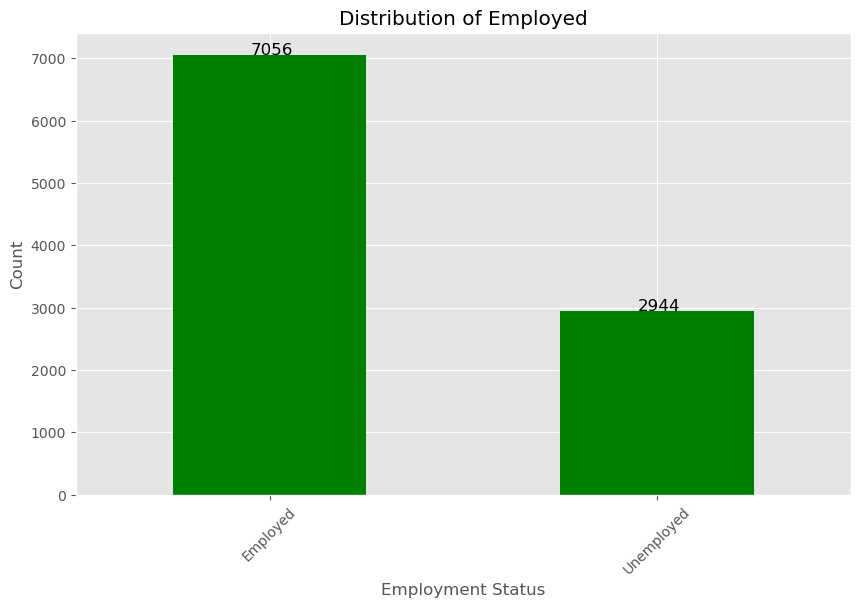

In [18]:
# Distribution of Employed
plt.figure(figsize=(10, 6))
ax = dist_employ.plot(kind='bar', color='green')
ax.set_title('Distribution of Employed')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_xticklabels(dist_employ.index, rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')
plt.show()

##### It shows that 7056 employees, and 2944 unemployed 

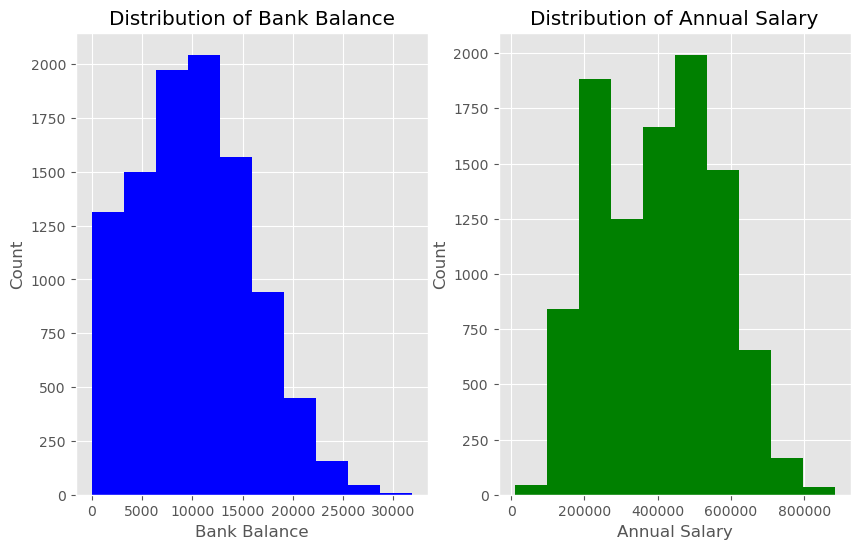

In [19]:
# Create subplots for the distribution of Bank Balance, and Annual Salary
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Customize subplot 1 - Bank Balance
axs[0].hist(df['Bank Balance'], bins=10, color='blue')
axs[0].set_title('Distribution of Bank Balance')
axs[0].set_xlabel('Bank Balance')
axs[0].set_ylabel('Count')

# Customize subplot 2 - Annual Salary
axs[1].hist(df['Annual Salary'], bins=10, color='green')
axs[1].set_title('Distribution of Annual Salary')
axs[1].set_xlabel('Annual Salary')
axs[1].set_ylabel('Count')

# Display the plot
plt.show()

#### It shows that most employees have account balances above 10,000 while their annual earning salary to be below 500,000.

In [21]:
# Distribution for the Defaulted 
dist_default = df['Defaulted'].value_counts()
dist_default

0    9667
1     333
Name: Defaulted, dtype: int64

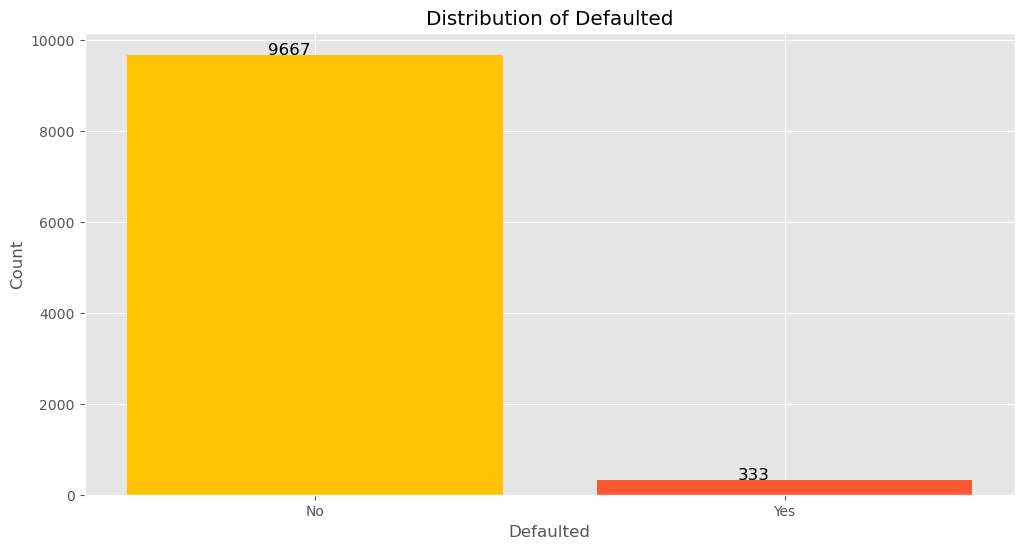

In [22]:
# Customize the chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(dist_default.index, dist_default.values, color=['#FFC300', '#FF5733'])
ax.set_title('Distribution of Defaulted')
ax.set_xlabel('Defaulted')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')

# Display the plot
plt.show()

####  The charts  show most employees of about 9667 will not default in loan payment while 333 employees shows tenddency to default loan payment

##  Bivariates Analysis

In [23]:
df.columns.tolist()

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

In [24]:
## Bank Balance by employed
bank_employ = df.groupby('Employed')['Bank Balance'].mean().round()
bank_employ

Employed
Employed       9261.0
Unemployed    11854.0
Name: Bank Balance, dtype: float64

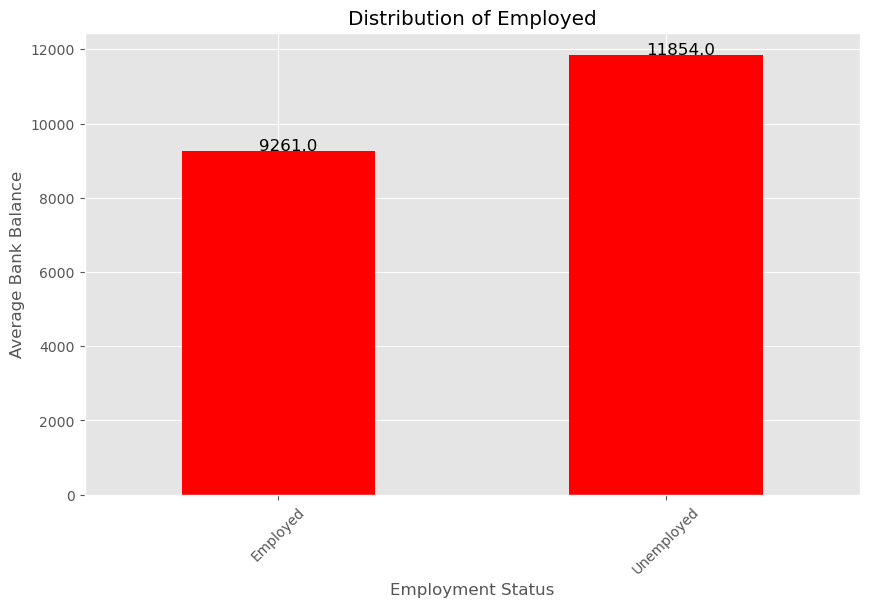

In [25]:
# Distribution of Employed By Bank Balance
plt.figure(figsize=(10, 6))
ax = bank_employ.plot(kind='bar', color='red')
ax.set_title('Distribution of Employed')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Average Bank Balance')
ax.set_xticklabels(dist_employ.index, rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')
plt.show()

####  The unemployed have more bank balance,  on average of 11854 compared to the employed workers with an average of 9261

In [26]:
## Annual salary by employee
Annual_employ = df.groupby('Employed')['Annual Salary'].mean().round()
Annual_employ

Employed
Employed      480143.0
Unemployed    215403.0
Name: Annual Salary, dtype: float64

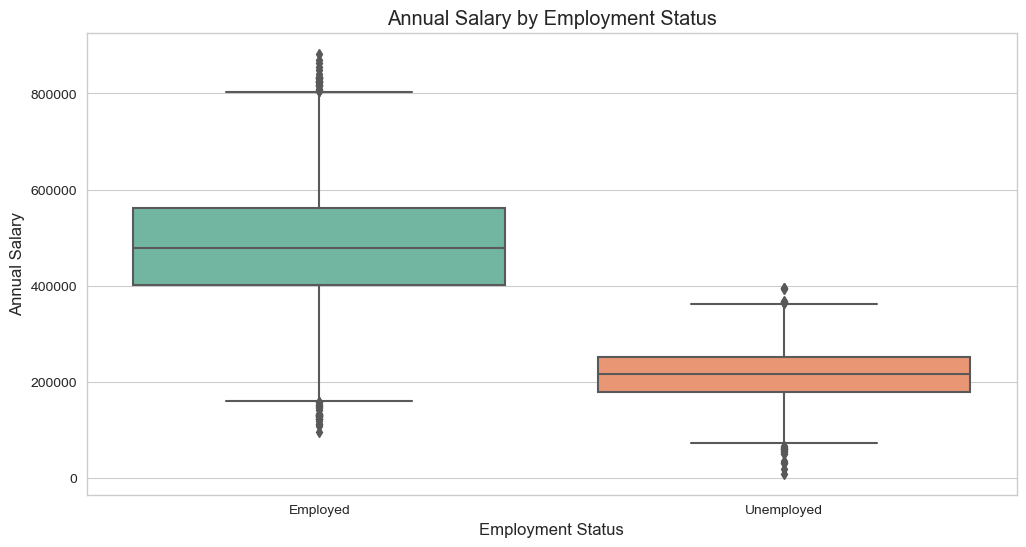

In [27]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employed', y='Annual Salary', data=df, palette='Set2')
plt.title('Annual Salary by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()

#### Seventy-five percent of the employees in  earn a salary of over 500,000, while the remaining 25 percent earn less than 500,000. The minimum salary  is below 200,000, and the maximum salary is 800,000. Seventy-five percent of unemployed individuals have an annual income slightly above 200,000, while 25 percent have an income slightly below 200,000. The maximum annual income is above 300,000.

In [29]:
## Annual salary by Default
Annual_Defaulted = df.groupby('Defaulted')['Annual Salary'].describe().astype('int')
Annual_Defaulted

,count,mean,std,min,25%,50%,75%,max
Defaulted,,,,,,,,
0,9667,402793,159819,9263,256860,415073,525885,882650
1,333,385069,165650,115965,228330,378184,516807,797597


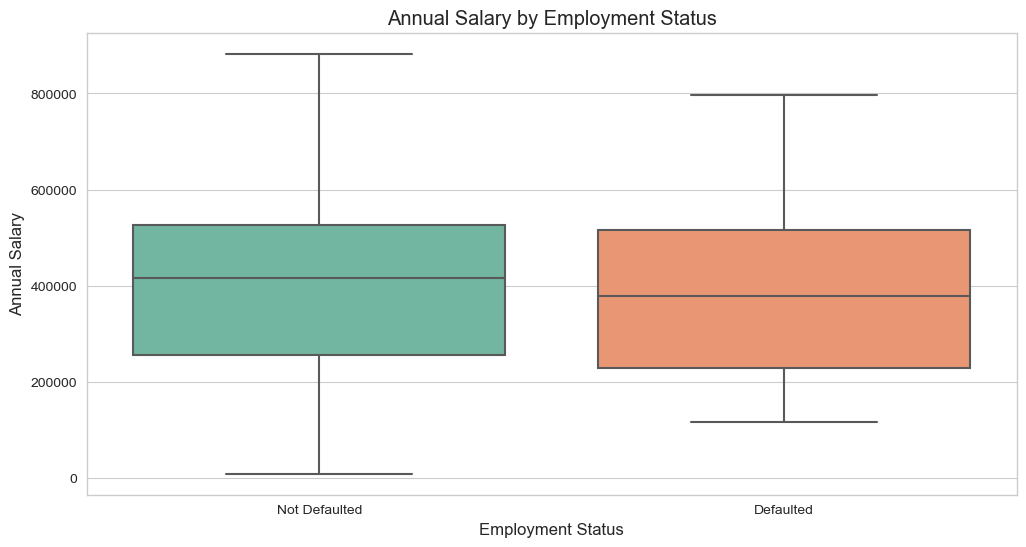

In [31]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defaulted', y='Annual Salary', data=df, palette='Set2')
# Add legend to the x-axis
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'])


plt.title('Annual Salary by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()

#### Seventy-five percent of non-defaulted individuals earn 525,885, while the remaining 25 percent earns 256,860. The maximum salary for non-defaulted individuals is 882,650. For defaulted individuals, 75 percent earn 516,808, while the remaining 25 percent earn 228,330. The maximum salary earned by defaulted individuals is 797,597.

In [32]:
## Bank Balance by Defaulted
df.groupby('Defaulted')['Bank Balance'].describe().astype('int')


,count,mean,std,min,25%,50%,75%,max
Defaulted,,,,,,,,
0,9667,9647,5477,0,5588,9634,13539,28692
1,333,20973,4095,7828,18139,21469,23866,31851


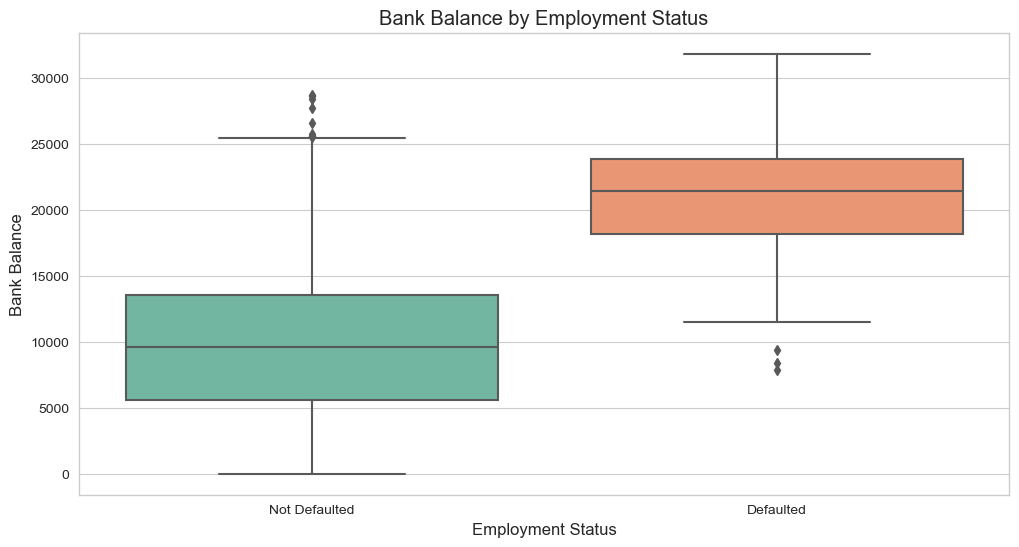

In [34]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defaulted', y='Bank Balance', data=df, palette='Set2')
# Add legend to the x-axis
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'])


plt.title('Bank Balance by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Bank Balance')

# Display the plot
plt.show()

### 75%  of the not defaulted employees have 13539 in their bank balance, while 25% of them have 5588 and the max account balance for non defaulted is 28692. 75% Defaulted have 23866 in their bank balance while 25% defaulted have 18139 in their bank balance and the min bank balnace for defaulted is 7228